In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _p_integrand(t, P_func, rho0, phi0):
    _rho = np.sqrt(rho0*rho0 + t*t)
    _theta = np.pi / 2.0 - np.arctan2(t,rho0)
    _phi = phi0
    
    _coord = (_rho, _theta, _phi)
    _Pval = P_func(_coord)
#     dldt_abs = np.sqrt( t*t * ( rho0*rho0 + t*t) + rho0*rho0 ) / ( rho0*rho0 + t*t )
    _dldt_abs = 1.0
    _integrand = _Pval * _dldt_abs
    return _integrand

In [3]:
from tdse.integral import numerical_integral_trapezoidal

def P_bar(rho0, phi0, P_func, z0):
    _t_arr = np.linspace(-z0,z0,1000)
    _integrand_arr = _p_integrand(_t_arr, P_func, rho0, phi0)
    _P_bar_val = 1.0 / (2.0 * z0) * numerical_integral_trapezoidal(_t_arr, _integrand_arr)
    return _P_bar_val

P_bar_vec = np.vectorize(P_bar, excluded=['P_func','z0'])

In [4]:
rho_arr = 0.1 * np.arange(1,30)
theta_arr = np.linspace(0, np.pi, 9)
phi_arr = np.linspace(0, 2*np.pi, 21)

In [5]:
R = 2.0
z0 = 1.5

# interpolation

In [6]:
def P_func(rho,theta,phi):
#     return np.ones_like(rho)
    return 1.0 * (rho < R)
#     return 1.3 if rho < 0.1 else 0.0

In [7]:
P_arr = P_func(*np.meshgrid(rho_arr, theta_arr, phi_arr, indexing='ij', sparse=False))

In [8]:
from scipy.interpolate import RegularGridInterpolator

P_func_interp = RegularGridInterpolator((rho_arr, theta_arr, phi_arr), P_arr)

# #

In [9]:
Rho_arr, Phi_arr = np.meshgrid(rho_arr[:-5], phi_arr)

In [10]:
Z_rho0 = z0 \
    + (np.sqrt(np.abs(R*R-Rho_arr*Rho_arr))-z0) * (Rho_arr > np.sqrt(R*R-z0*z0)) \
    + (0 - np.sqrt(np.abs(R*R-Rho_arr*Rho_arr))) * (Rho_arr > R)

In [11]:
P_bar_ana_arr = 2.0 * Z_rho0 / (2.0 * z0)

In [12]:
P_bar_arr = P_bar_vec(Rho_arr, Phi_arr, P_func_interp, z0=z0)
# P_bar_ana_arr = 1.3 * 2.0 * np.sqrt(2.0*2.0 - Rho_arr*Rho_arr - (2.0*2.0 - Rho_arr*Rho_arr)*(Rho_arr>(np.sqrt(2.0*2.0 - z0*z0)))) / (2.0 * z0)

In [13]:
P_bar_diff_arr = P_bar_ana_arr - P_bar_arr

# Plot

In [14]:
from matplotlib import rcParams

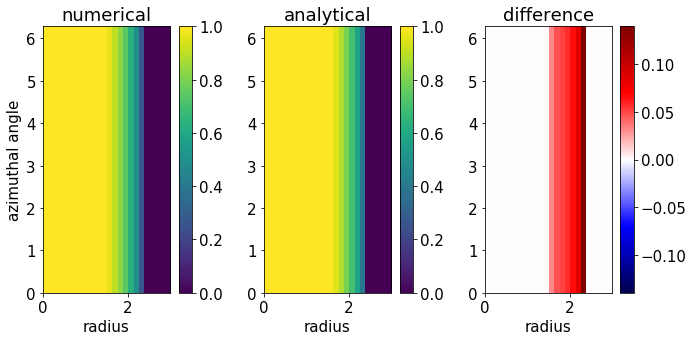

In [15]:
rcParams['font.size'] = 15

extent = (0.0, 3.0, 0.0, 2.0*np.pi)

fig, (ax1, ax2, axdiff) = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
pcm1 = ax1.imshow(P_bar_arr, extent=extent)
pcm2 = ax2.imshow(P_bar_ana_arr, extent=extent)

vmax = np.abs(P_bar_diff_arr).max()
vmin = -vmax
pcmdiff = axdiff.imshow(P_bar_diff_arr, extent=extent, cmap='seismic', vmax=vmax, vmin=vmin)

ax1.set_title("numerical")
ax2.set_title("analytical")
axdiff.set_title("difference")

ax1.set_xlabel("radius")
ax2.set_xlabel("radius")
axdiff.set_xlabel("radius")

ax1.set_ylabel("azimuthal angle")

fig.colorbar(pcm1, ax=ax1)
fig.colorbar(pcm2, ax=ax2)
fig.colorbar(pcmdiff, ax=axdiff)

fig.tight_layout()
# fig.savefig("comparison-for-radial-step-P_func.png")

# Plot in polar and spherical coordinate

In [16]:
t_arr = np.linspace(-z0,z0,9)

In [17]:
rho0 = 1.0

In [18]:
rho_arr = np.sqrt(rho0*rho0 + t_arr*t_arr)
theta_arr = np.pi / 2.0 - np.arctan2(t_arr, rho0)

In [19]:
x_arr = rho_arr * np.sin(theta_arr)
z_arr = rho_arr * np.cos(theta_arr)

In [20]:
aa = np.sqrt( t_arr*t_arr * ( rho0*rho0 + t_arr*t_arr) + rho0*rho0 ) / ( rho0*rho0 + t_arr*t_arr )

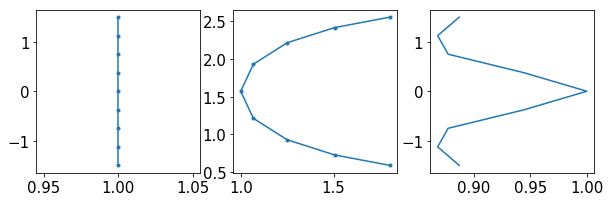

In [21]:
figzz, (azz, ap, ass) = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

azz.plot(x_arr, z_arr, '.-')
ap.plot(rho_arr, theta_arr, '.-')
ass.plot(aa, t_arr)